In [1]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi

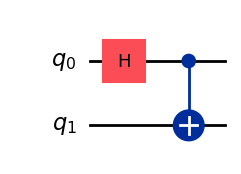

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

In [3]:
qc = qc.to_gate() # transforma o circuito em uma porta logica
qc.name = "Control-U"
cU = qc.control() # transformar a porta qc em uma porta controlada

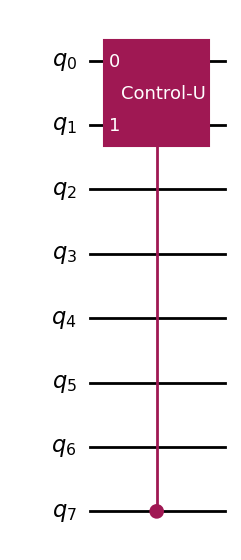

In [4]:
circ = QuantumCircuit(8)
circ.append(cU,[7] + [0,1]) 
circ.draw("mpl")

In [5]:
# fx = a^x mod 15

def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)     
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    #U = U.to_gate()
    #U.name = "%i^%i mod 15" % (a, power)
    #c_U = U.control()
    return U

In [6]:
qc = QuantumCircuit(4)
qc.x(3) # coloncando no estado |1> = 0001 (no qiskit (1000)

U = c_amod15(7,3)
qc.append(U,range(4))

from qiskit.quantum_info import Statevector
Statevector(qc).sample_counts(shots=10)

{'1011': 10}

In [7]:
print(int("1101",2))

13
